<a href="https://colab.research.google.com/github/Aditya9015/demo/blob/main/final%20major%20btp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Performance Comparison of Machine Learning Algorithms for Parkinson's Disease Detection**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from IPython.display import display

# For correlation heatmap and pair plot
from sklearn.metrics import confusion_matrix  # If needed for display
from sklearn.metrics import ConfusionMatrixDisplay
import requests  # For loading data from a URL or API

In [2]:
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

**Data Preview**

In [3]:

# Exploring Dataset Content
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:

df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [6]:

# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)


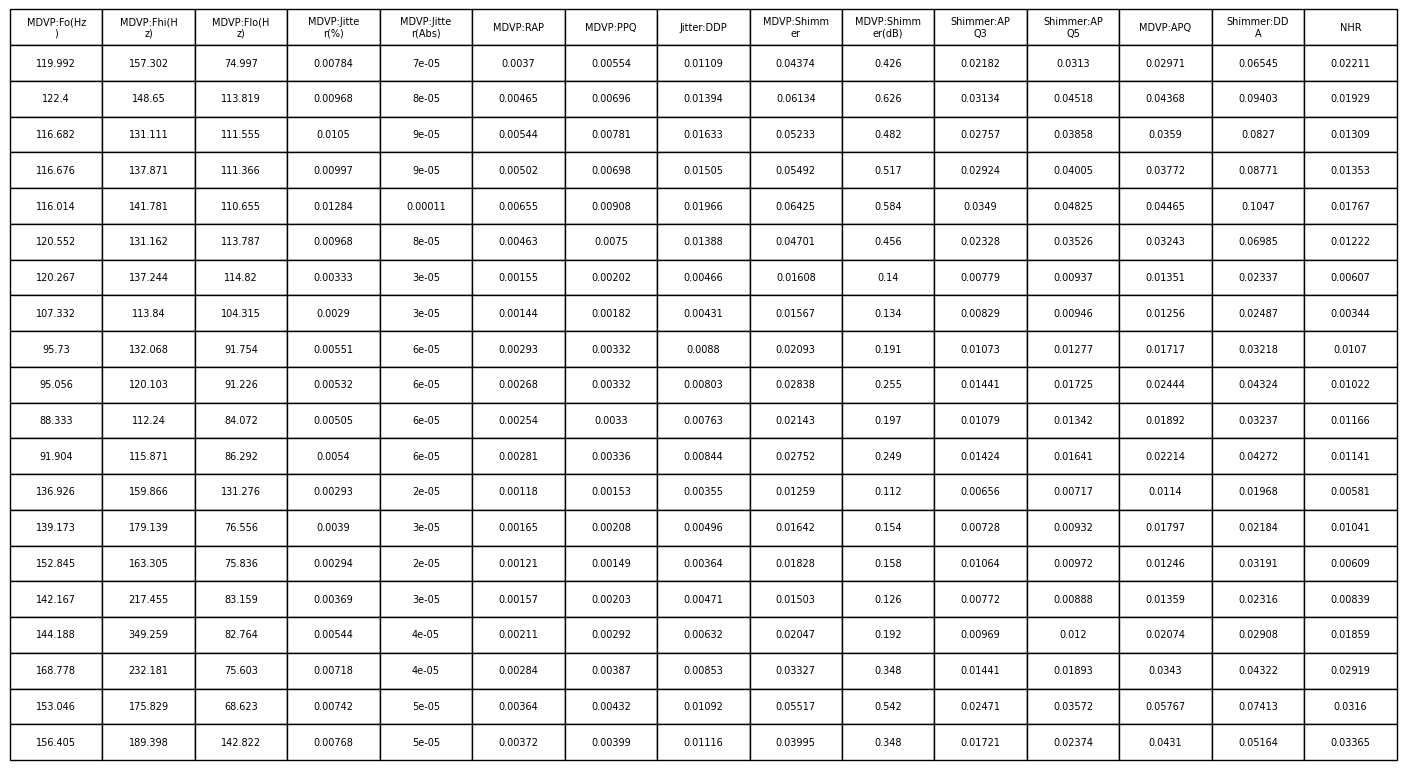

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Sample only the first 20 rows and first 15 columns
df_sample = df.iloc[:20, :15]

# Wrap column headers for better visibility
wrapped_labels = ['\n'.join(textwrap.wrap(col, width=10)) for col in df_sample.columns]

# Create the figure
fig, ax = plt.subplots(figsize=(16, 8))  # Adjust width and height as needed
ax.axis('off')

# Create the table
tbl = ax.table(cellText=df_sample.values,
               colLabels=wrapped_labels,
               loc='center',
               cellLoc='center',
               colLoc='center')

# Formatting
tbl.auto_set_font_size(False)
tbl.set_fontsize(7)
tbl.scale(1.5, 2.0)  # Wider and taller cells for clarity

# Tight layout
plt.tight_layout(pad=2.0)
plt.savefig('csv_snapshot_wrapped_15cols.png', dpi=300, bbox_inches='tight')
plt.show()



**Features**

In [8]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [9]:

df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:

df['status'] = df['status'].astype('uint8')

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [12]:

print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [13]:

# Checking For Missing Values In Dataset
df.isna().sum()


,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


**Imbalanced Data**

<Axes: xlabel='status', ylabel='count'>

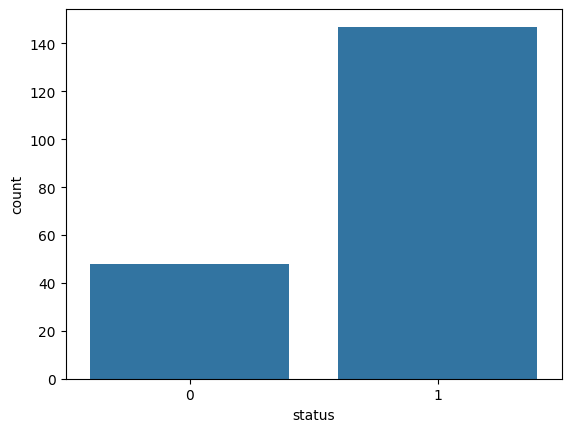

In [14]:

sns.countplot(x='status',data=df)

**Heatmap**

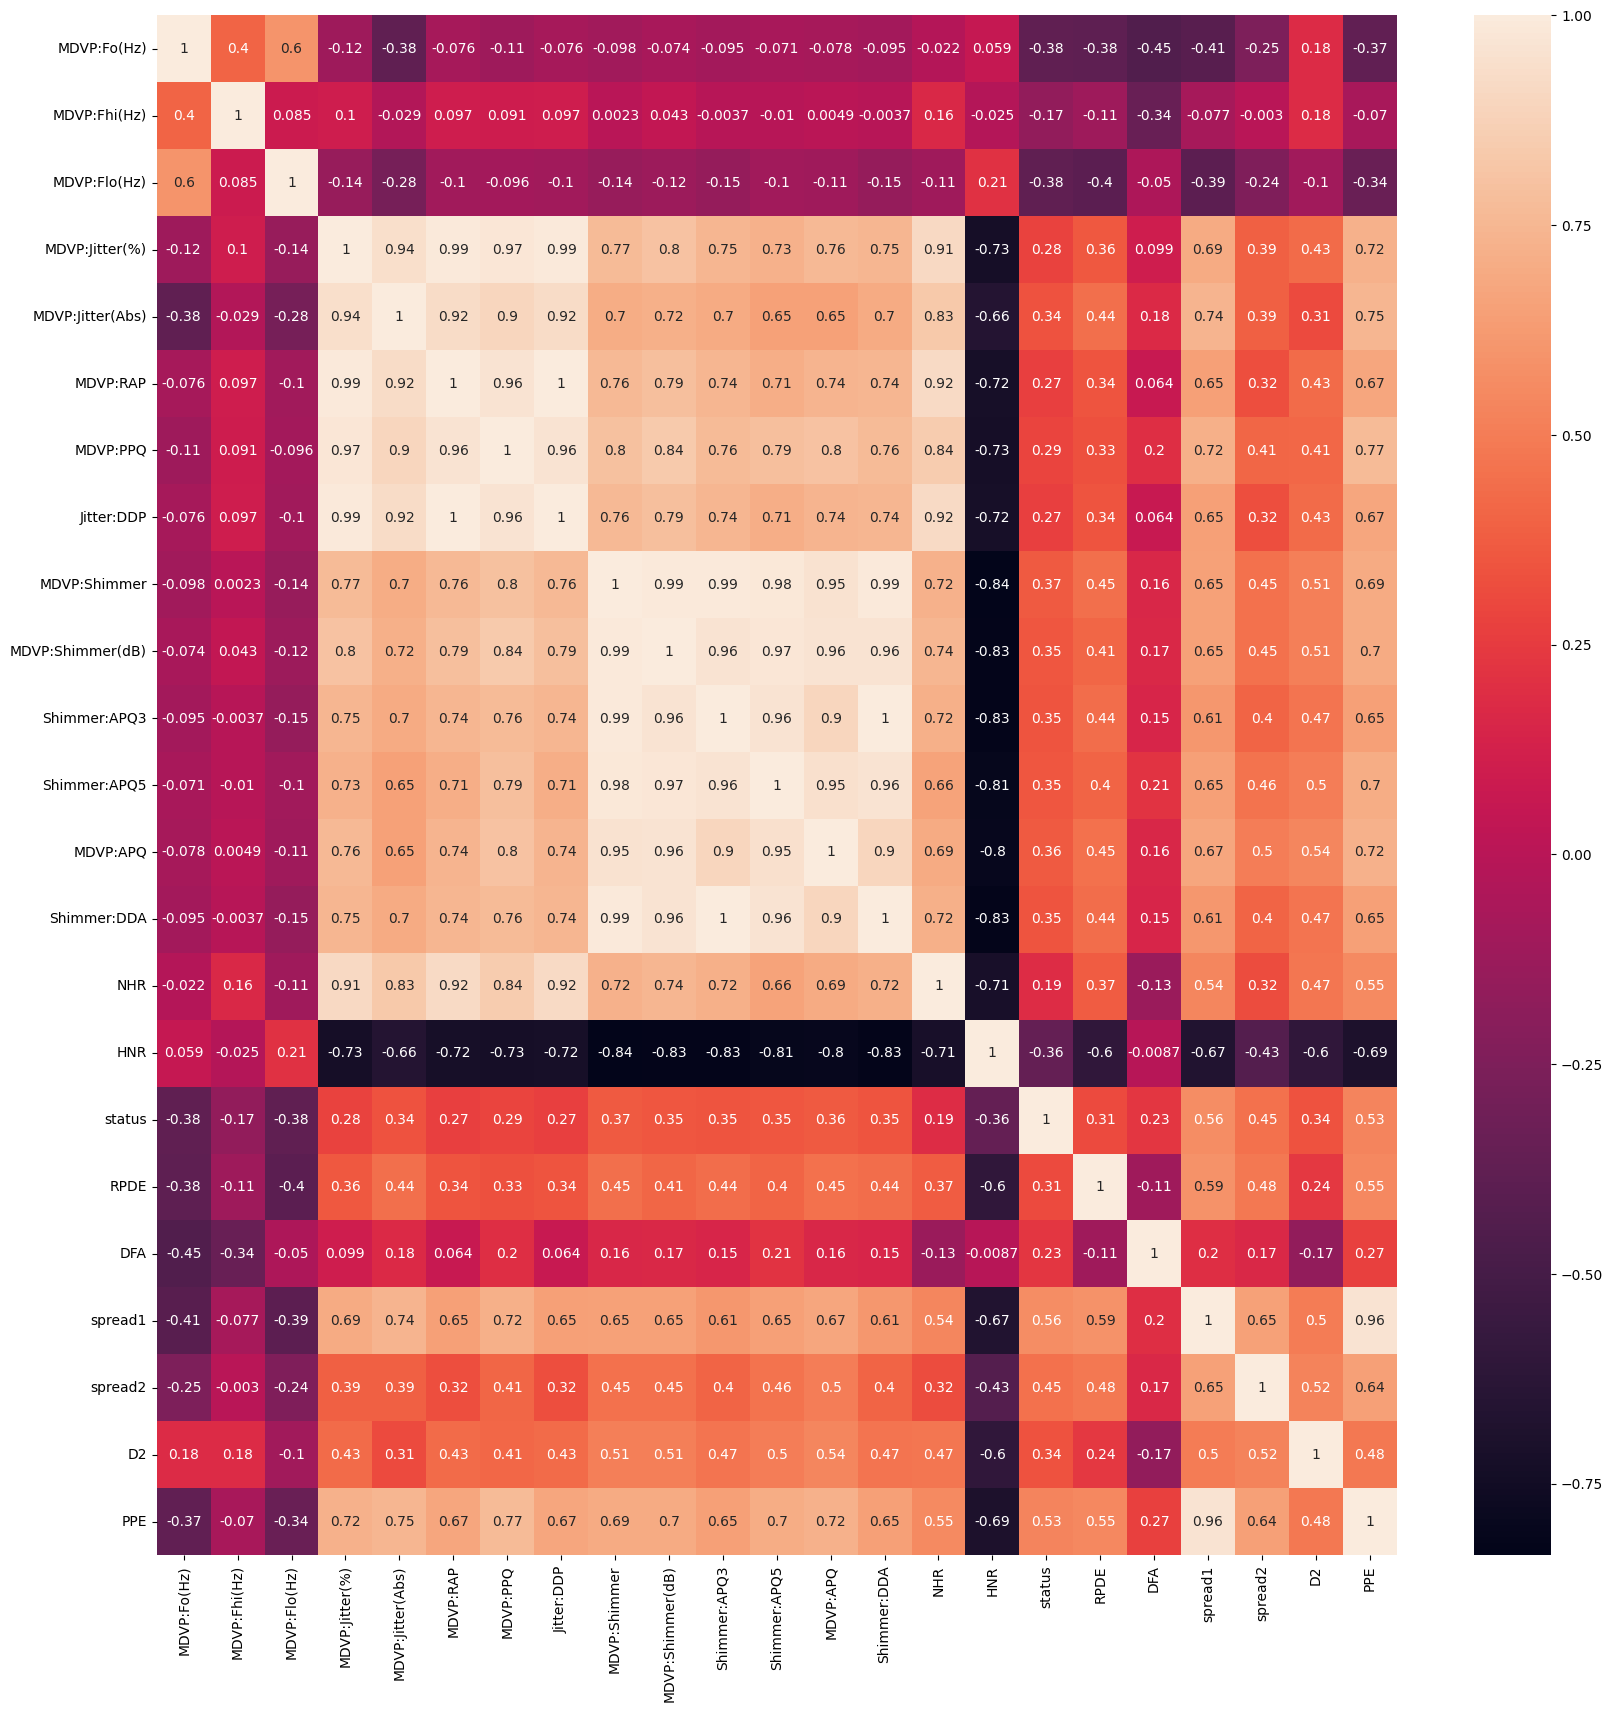

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(df.corr(), annot=True, ax=ax)

# Save the heatmap as an image (e.g., PNG file)
fig.savefig('heatmap_image.png', dpi=300, bbox_inches='tight')

# Optional: Display the plot
plt.show()

**Box Plot**

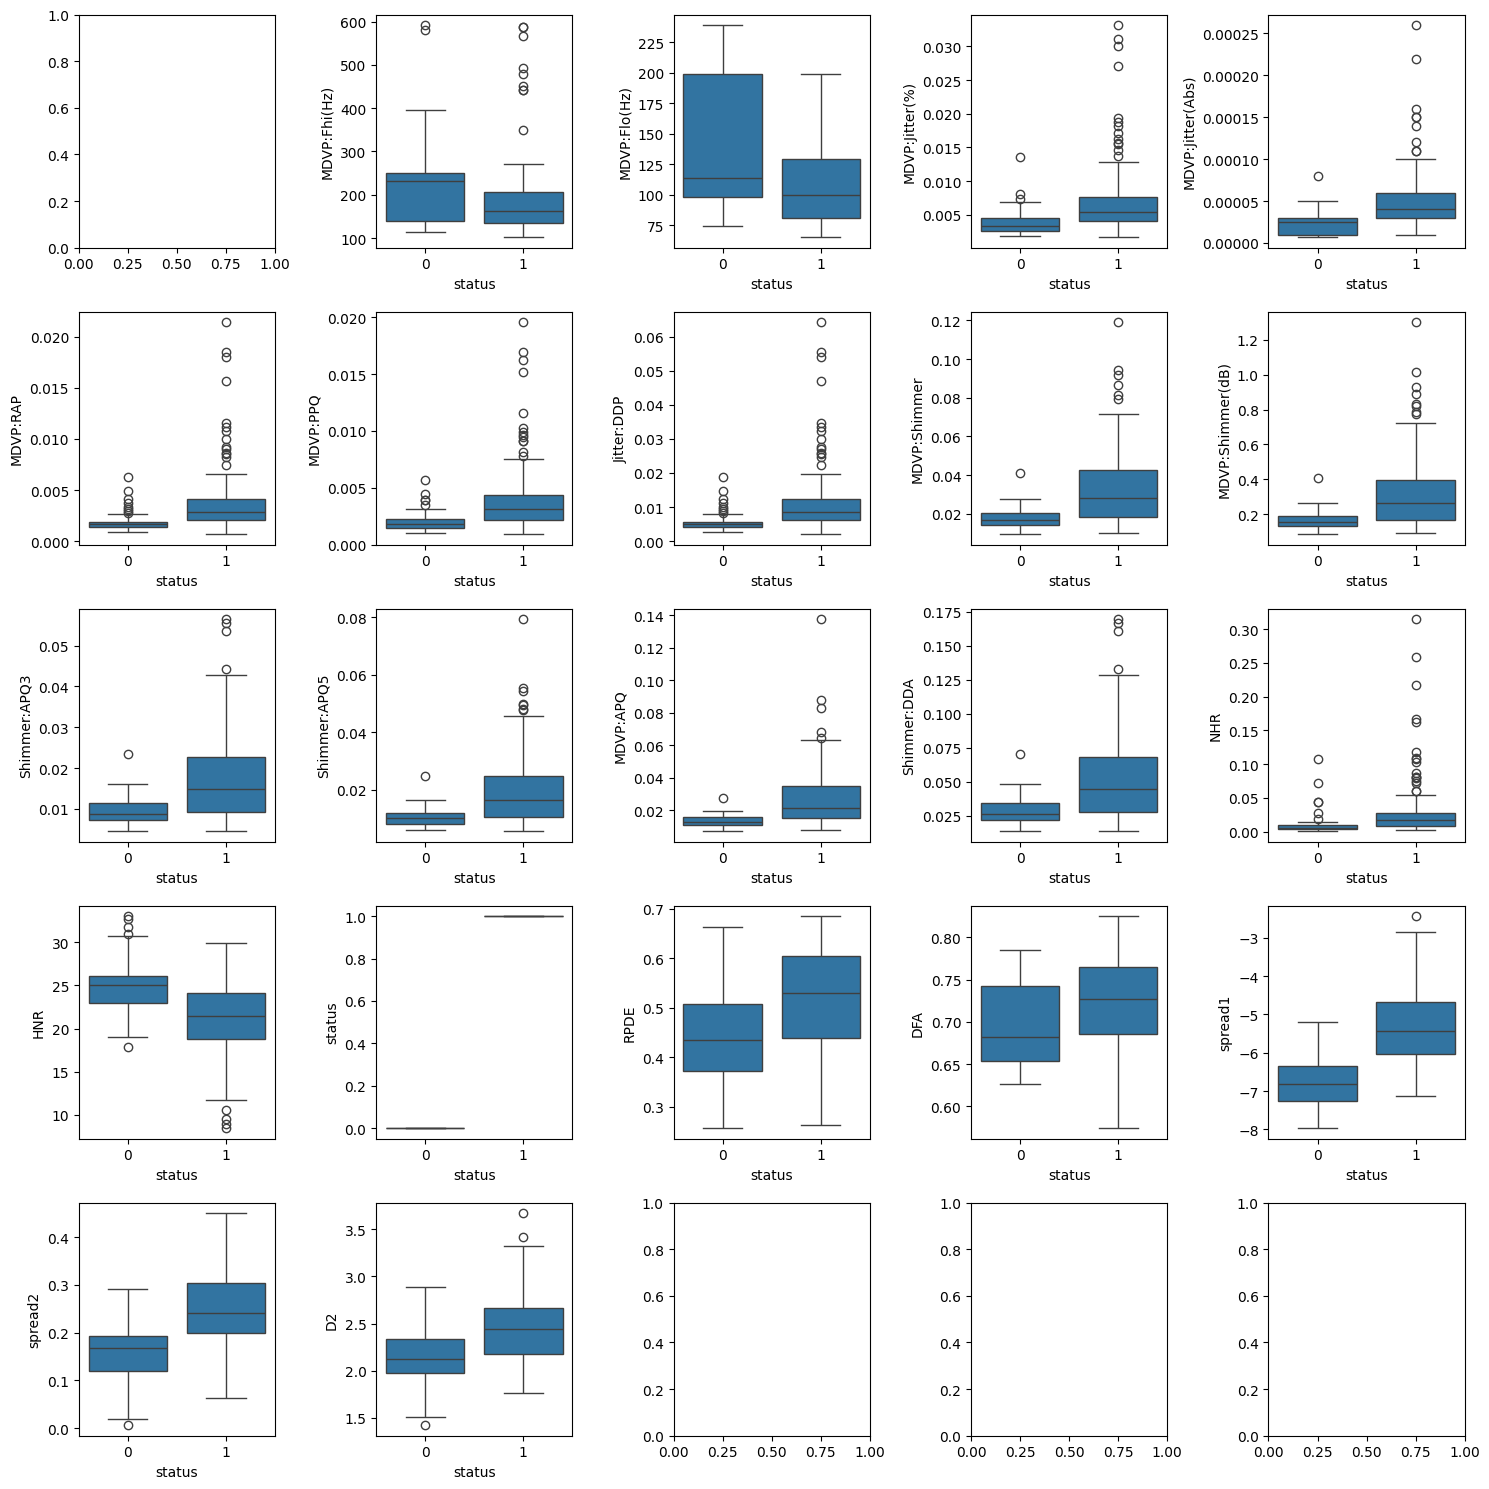

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the subplots (5x5 grid for your box plots)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

# Loop through the columns and create a boxplot for each
for i in range(1, len(df.columns)-1):  # Excluding the first and last columns (if required)
    sns.boxplot(x='status', y=df.iloc[:, i], data=df, orient='v', ax=axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Save the box plots to an image file (e.g., PNG)
fig.savefig('box_plots.png', dpi=300, bbox_inches='tight')

# Optionally, display the plots
plt.show()

**Pair Plot**

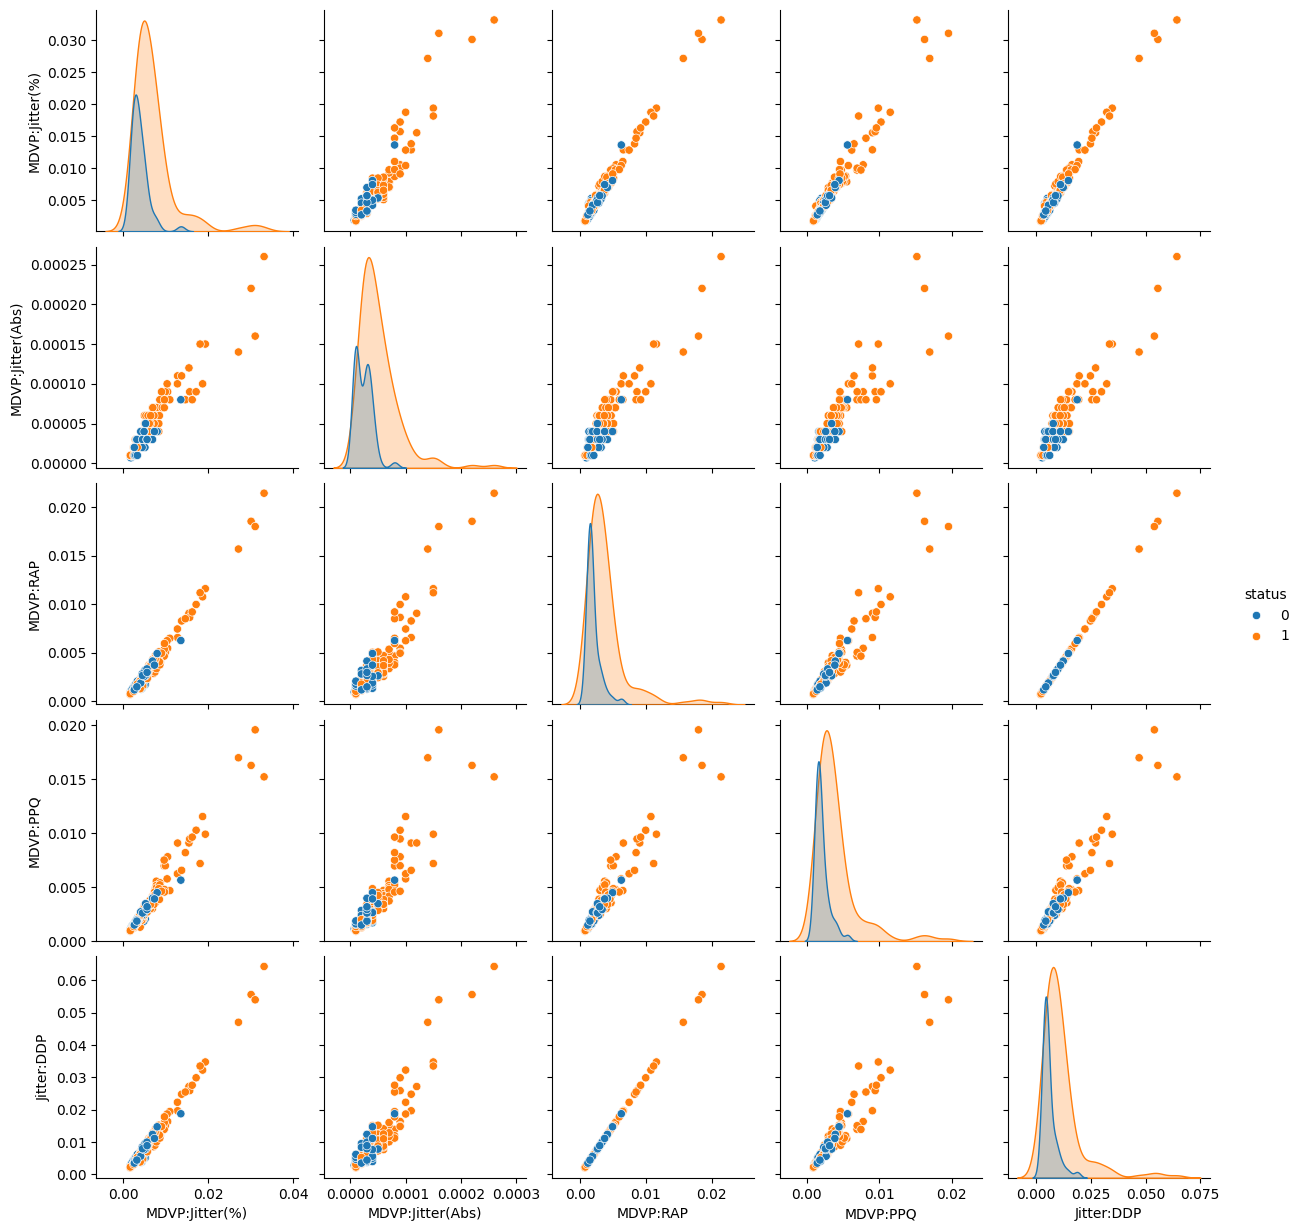

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (15, 4)

# Create the pair plot
pairplot = sns.pairplot(df, hue='status', vars=['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'])

# Save the pair plot to an image file (e.g., PNG)
pairplot.savefig('pairplot_image.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()


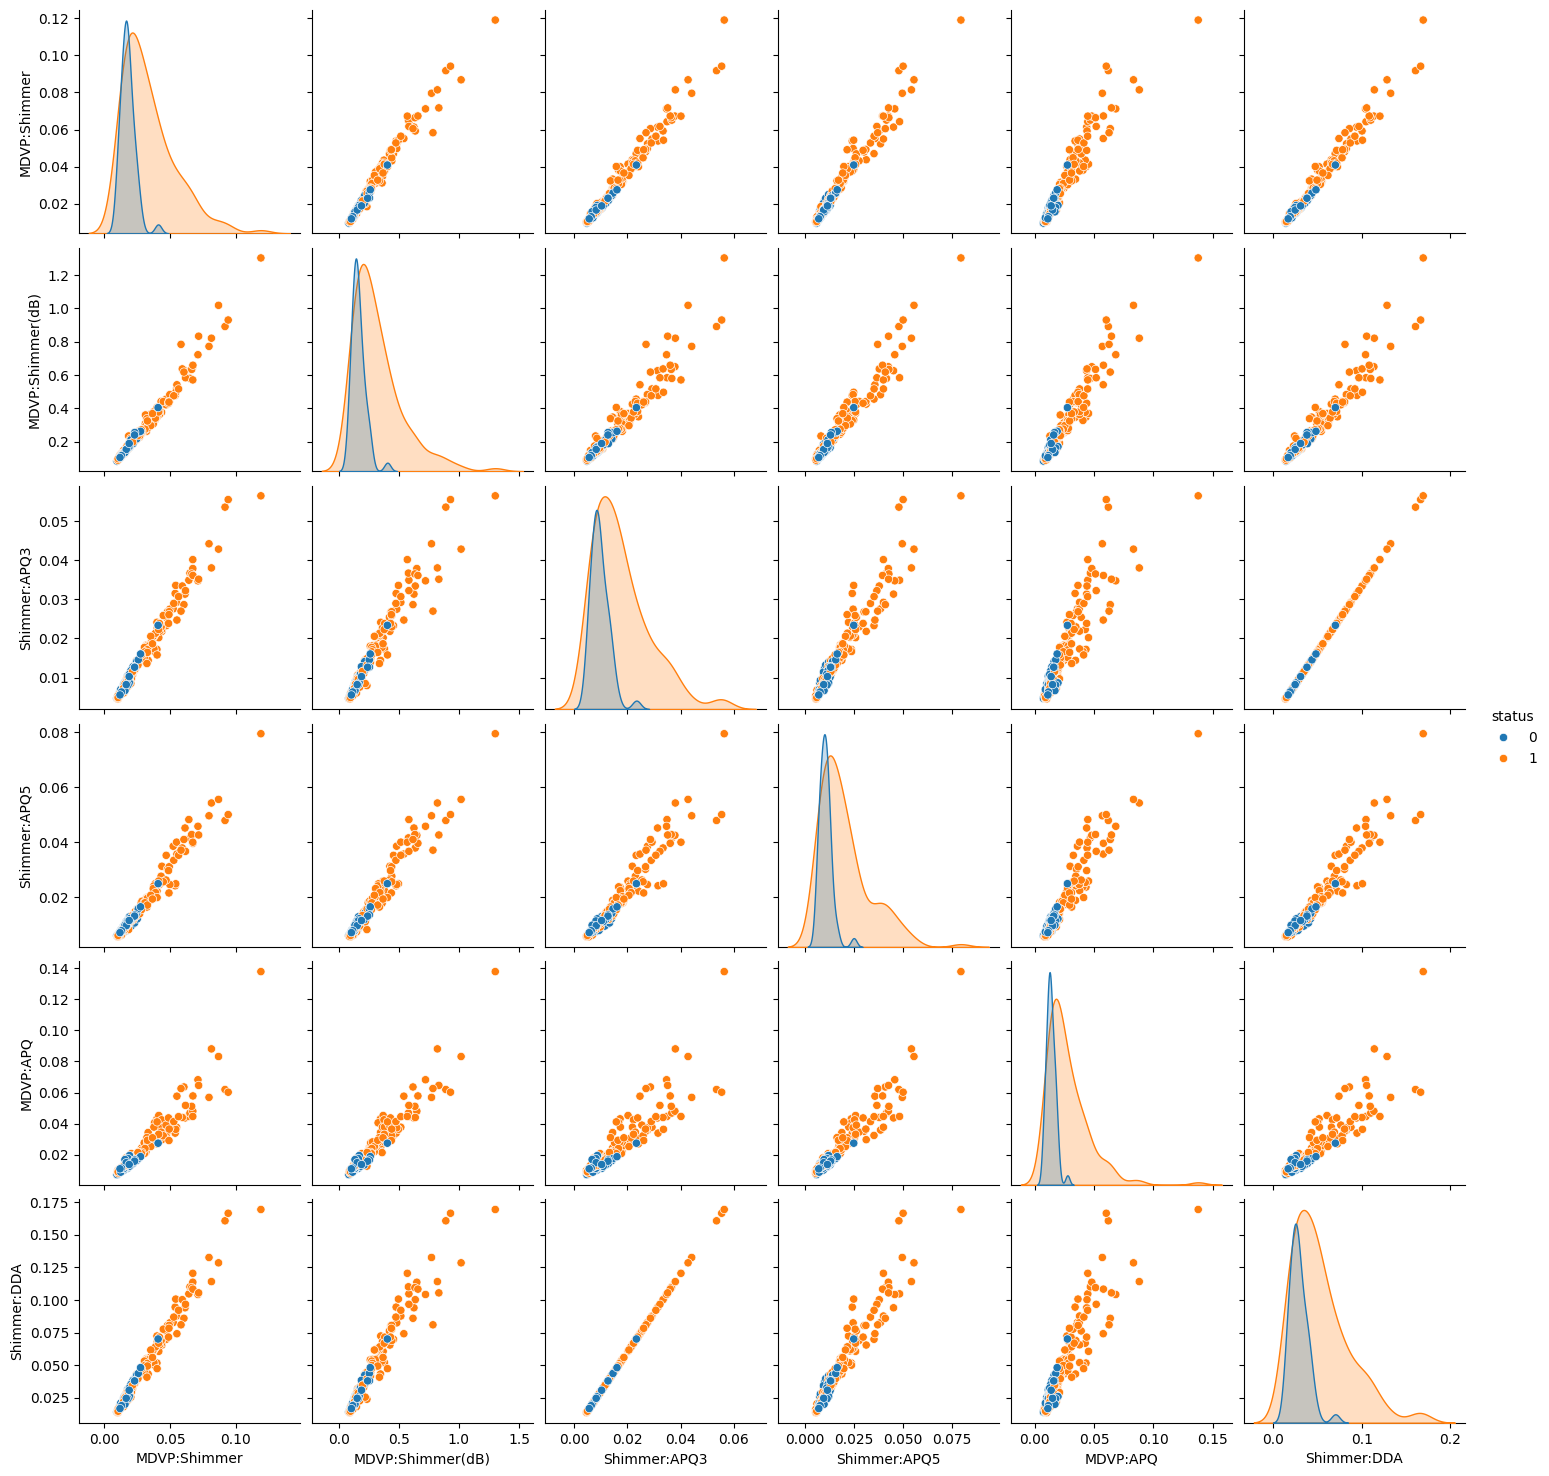

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (15, 4)

# Create the pair plot with the specified variables
pairplot = sns.pairplot(df, hue='status', vars=['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'])

# Save the pair plot to an image file (e.g., PNG)
pairplot.savefig('pairplot_shimmer_image.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

In [19]:

# Exploring Imabalance In Dataset
df['status'].value_counts()

,count
status,
1,147
0,48


**Droping Status before balancing**

In [20]:

X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


**Data Balancing**

In [21]:

# Scaling features between -1 and 1  for mormalization
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
scaler = StandardScaler()

In [22]:


X_scaled = scaler.fit_transform(X)
# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [23]:

print('Feature (X) Shape After Balancing :', X_resampled.shape)
print('Target (y) Shape After Balancing :', y_resampled.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


**Balanced Data**

Plot saved successfully.


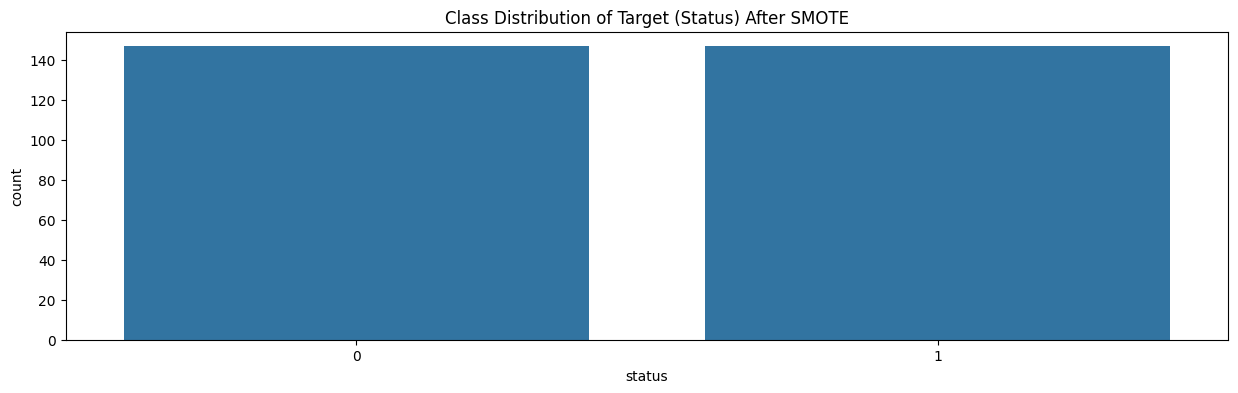

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution of the target variable (status) after SMOTE
sns.countplot(x=y_resampled)
plt.title('Class Distribution of Target (Status) After SMOTE')

try:
    plt.savefig(r'C:\Users\ABHISHEK PANDEY\OneDrive\Desktop\parkinsons\class_distribution_after_smote.png', format='png')
    print("Plot saved successfully.")
except Exception as e:
    print("Error saving plot:", e)



# Show the plot
plt.show()


In [25]:

smote_counts = pd.Series(y_resampled).value_counts()
print(smote_counts)

status
1    147
0    147
Name: count, dtype: int64


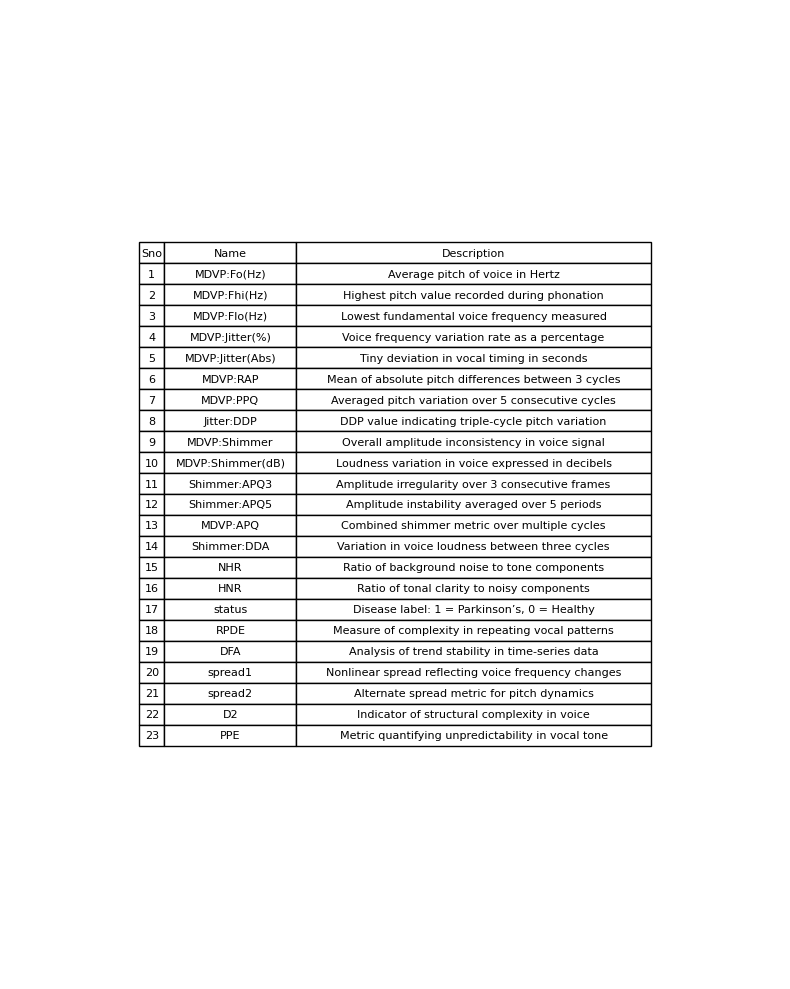

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Sno": list(range(1, 24)),
    "Name": [
        "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
        "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)",
        "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR",
        "HNR", "status", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"
    ],
    "Description": [
        "Average pitch of voice in Hertz",
        "Highest pitch value recorded during phonation",
        "Lowest fundamental voice frequency measured",
        "Voice frequency variation rate as a percentage",
        "Tiny deviation in vocal timing in seconds",
        "Mean of absolute pitch differences between 3 cycles",
        "Averaged pitch variation over 5 consecutive cycles",
        "DDP value indicating triple-cycle pitch variation",
        "Overall amplitude inconsistency in voice signal",
        "Loudness variation in voice expressed in decibels",
        "Amplitude irregularity over 3 consecutive frames",
        "Amplitude instability averaged over 5 periods",
        "Combined shimmer metric over multiple cycles",
        "Variation in voice loudness between three cycles",
        "Ratio of background noise to tone components",
        "Ratio of tonal clarity to noisy components",
        "Disease label: 1 = Parkinson’s, 0 = Healthy",
        "Measure of complexity in repeating vocal patterns",
        "Analysis of trend stability in time-series data",
        "Nonlinear spread reflecting voice frequency changes",
        "Alternate spread metric for pitch dynamics",
        "Indicator of structural complexity in voice",
        "Metric quantifying unpredictability in vocal tone"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('off')

# Create table
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust font and cell sizing
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)

# Set appropriate column widths based on string lengths
col_widths = [0.05, 0.15, 0.4]  # Proportional width: small, medium, and compact to fit text closely
for i, width in enumerate(col_widths):
    tbl.auto_set_column_width(i)
    for key, cell in tbl.get_celld().items():
        if key[1] == i:
            cell.set_width(width)

plt.tight_layout()
plt.savefig('compact_proper_width_table.png', dpi=300)
plt.show()


# **MODELS**

**Random Forest Classifier**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Random Forest Evaluation Metrics:
      Metric    Score
0   Accuracy  97.3000
1  Precision  97.3700
2     Recall  97.3700
3   F1 Score  97.3700
4        MCC  94.5906


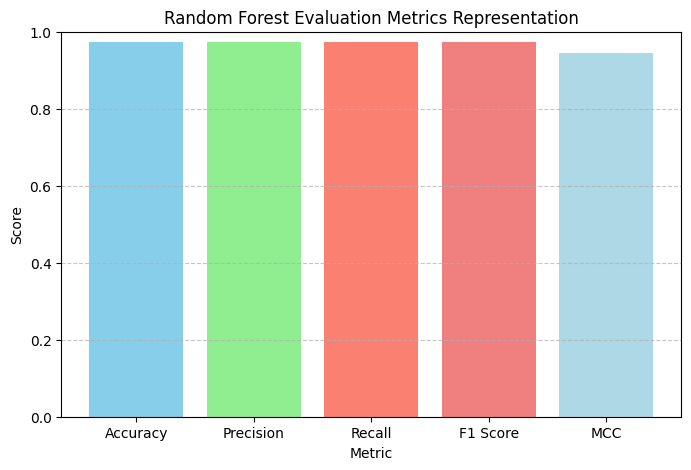

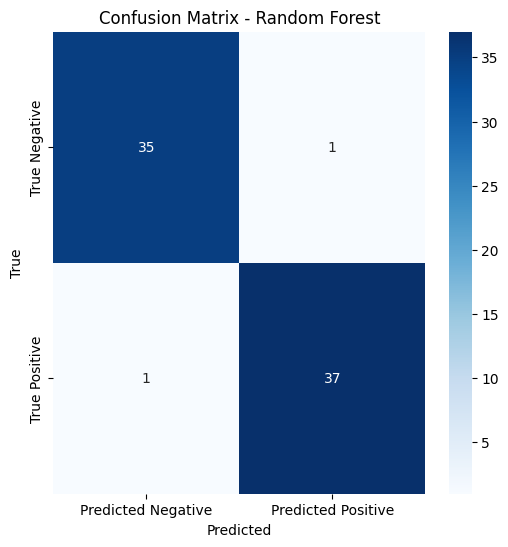

In [27]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)


# 2. Load and preprocess
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# 3. Hyperparameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# 4. GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_macro', verbose=0)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# 5. Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Results Table
results_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_rf * 100, 2), round(precision_rf * 100, 2),
              round(recall_rf * 100, 2), round(f1_rf * 100, 2), round(mcc_rf * 100, 4)]
})

print("Random Forest Evaluation Metrics:")
print(results_rf)

# Bar Chart
metrics_rf = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_rf = results_rf['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_rf, scores_rf, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Random Forest Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')

plt.savefig("confusion_matrix_RandomForest.png", dpi=300)

plt.show()



**Support vector machine (SVM)**

Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVM Evaluation Metrics 
      Metric    Score
0   Accuracy   98.650
1  Precision   97.440
2     Recall  100.000
3   F1 Score   98.700
4        MCC   97.329


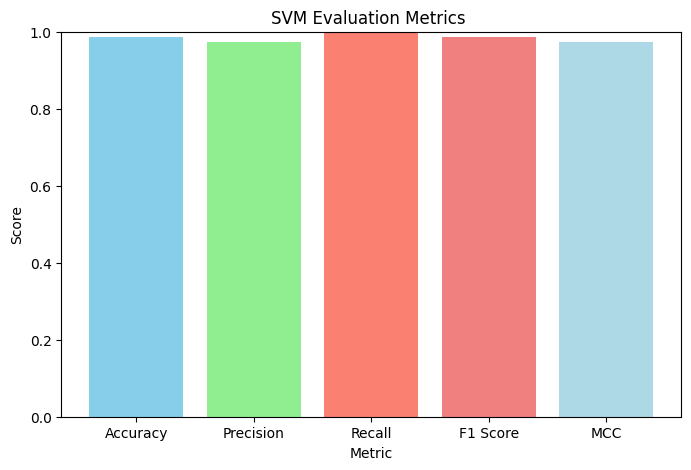

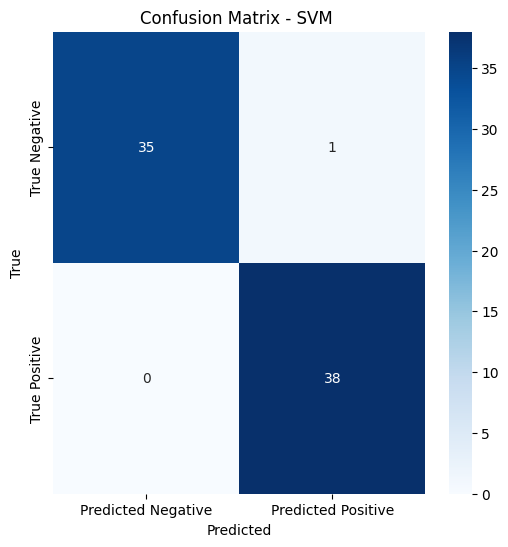

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Download data from URL
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

# Read dataset
df = pd.read_csv('data.csv')

# Separate features and target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split (no PCA now)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# SVM Hyperparameter Grid
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1]},
]

# GridSearchCV for best SVM
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro', verbose=1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc * 100, 4)]
})

print("SVM Evaluation Metrics ")
print(results)

# Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('SVM Evaluation Metrics ')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM ')
plt.savefig("confusion_matrix_SVM.png", dpi=300)
plt.show()

**Extreme Gradient Boosting (XGboost)**

XGBoost Evaluation Metrics 
      Metric     Score
0   Accuracy   95.9500
1  Precision  100.0000
2     Recall   92.1100
3   F1 Score   95.8900
4        MCC   92.2064


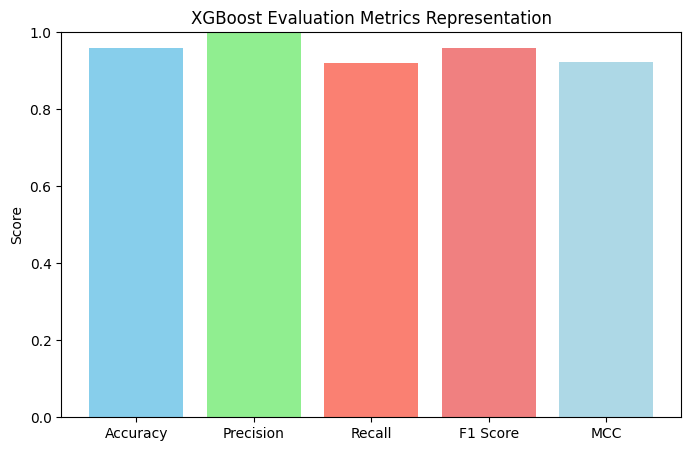

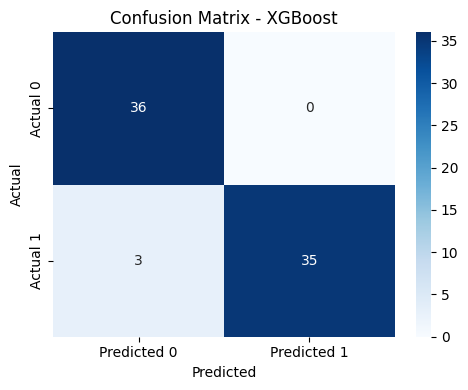

In [29]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from xgboost import XGBClassifier

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)

# Feature/Target separation
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)



# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', verbose=0)
grid_xgb.fit(X_train, y_train)

# Best model & prediction
best_xgb_model = grid_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test)


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)



results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc*100, 4)]
})

print("XGBoost Evaluation Metrics ")
print(results)

# Data for the chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100
# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('XGBoost Evaluation Metrics Representation')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost.png", dpi=300)
plt.show()

**KNeighborsClassifier(KNN)**

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best CV Accuracy: 92.27%
KNN Evaluation Metrics:
      Metric     Score
0   Accuracy   97.3000
1  Precision  100.0000
2     Recall   94.5900
3   F1 Score   97.2200
4        MCC   94.7331


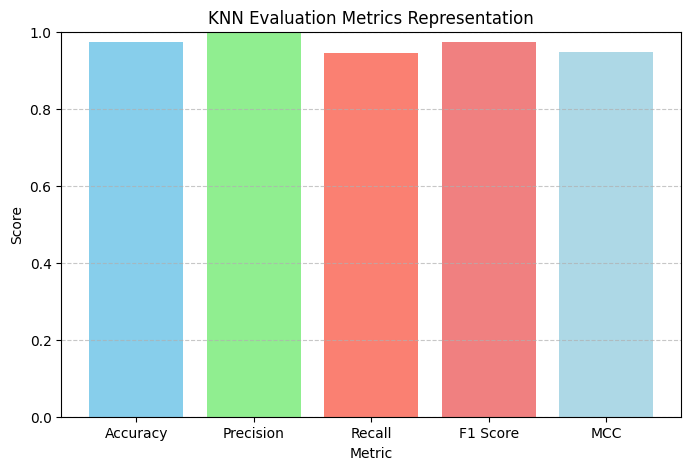

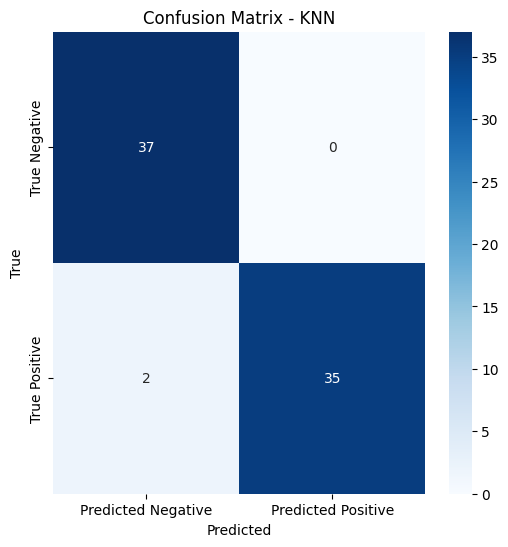

In [30]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Add this import

# 1. Load dataset from UCI
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

df = pd.read_csv('data.csv')

# 2. Preprocess
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Scaling before SMOTE
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE (Apply after scaling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

# 4. GridSearchCV to find best 'k' (number of neighbors)
param_grid = {
    'n_neighbors': list(range(4, 21)),  # Try K from 4 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting strategies
    'metric': ['euclidean']  # Optional: can try others like 'manhattan' too
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

# 5. Best parameters
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid.best_score_ * 100))

# 6. Evaluate on the test set using best estimator
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Store results in DataFrame
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2),
              round(recall * 100, 2), round(f1 * 100, 2), round(mcc * 100, 4)]
})

# Print performance table
print("KNN Evaluation Metrics:")
print(results)

# Bar Chart for performance metrics
plt.figure(figsize=(8, 5))
scores = results['Score'].values / 100  # Convert to 0-1 scale for plotting
plt.bar(results['Metric'], scores,
        color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])

plt.title('KNN Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.savefig("confusion_matrix_knn.png", dpi=300)
plt.show()

**Decision Tree Classifier**

Decision Tree Evaluation Metrics:
      Metric    Score
0   Accuracy  95.9500
1  Precision  97.3000
2     Recall  94.7400
3   F1 Score  96.0000
4        MCC  91.9255


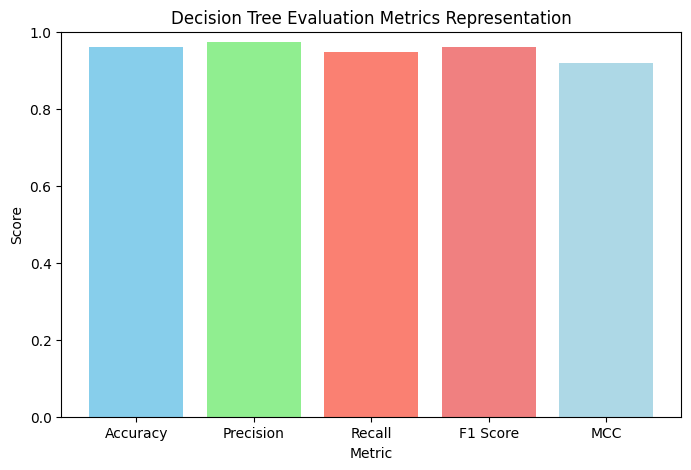

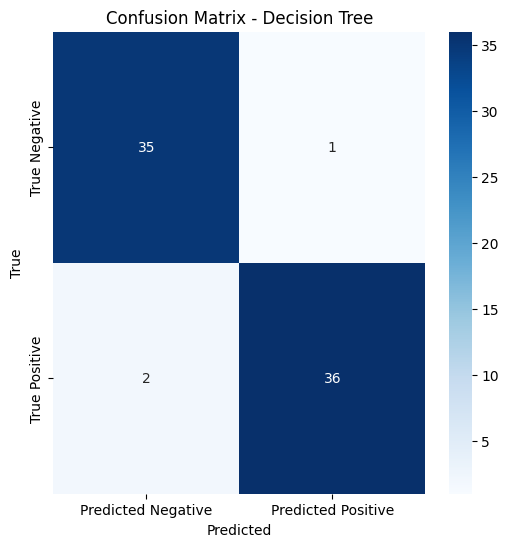

In [31]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_macro', verbose=0)
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display results in table
results_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_dt * 100, 2), round(precision_dt * 100, 2), round(recall_dt * 100, 2), round(f1_dt * 100, 2), round(mcc_dt*100, 4)]
})

print("Decision Tree Evaluation Metrics:")
print(results_dt)

# Bar chart
metrics_dt = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_dt = results_dt['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_dt, scores_dt, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Decision Tree Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.savefig("confusion_matrix_dt.png", dpi=300)
plt.show()


**Logistic Regression**

Logistic Regression Evaluation Metrics:
      Metric    Score
0   Accuracy  83.7800
1  Precision  82.5000
2     Recall  86.8400
3   F1 Score  84.6200
4        MCC  67.5956


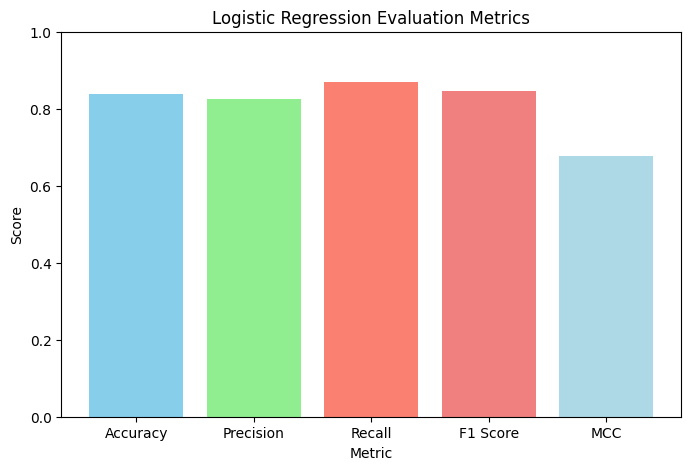

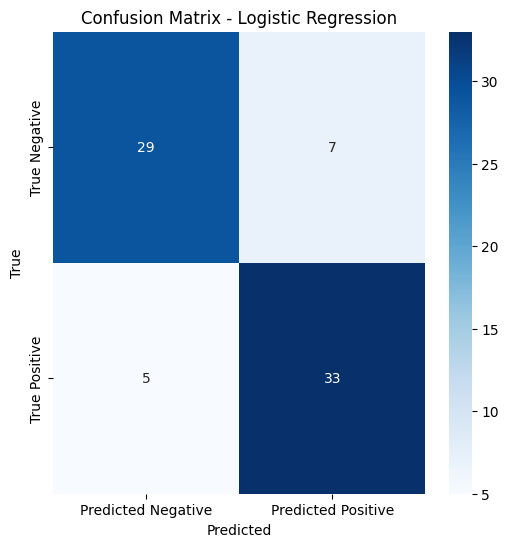

In [32]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],               # Only 'l2' penalty is supported by solver 'lbfgs'
    'solver': ['lbfgs']               # Optimizer
}

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='f1_macro', verbose=0)
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='binary')
recall_lr = recall_score(y_test, y_pred_lr, average='binary')
f1_lr = f1_score(y_test, y_pred_lr, average='binary')
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display results in table
results_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_lr * 100, 2), round(precision_lr * 100, 2), round(recall_lr * 100, 2), round(f1_lr * 100, 2), round(mcc_lr*100, 4)]
})

print("Logistic Regression Evaluation Metrics:")
print(results_lr)

# Bar chart
metrics_lr = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_lr = results_lr['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_lr, scores_lr, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Logistic Regression Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("confusion_matrix_LR.png", dpi=300)
plt.show()

# **Result and Comparision**


=== Model Evaluation Comparison Table ===

                     Accuracy  Precision  Recall  F1 Score    MCC
Random Forest           97.30      97.37   97.37     97.37  94.59
SVM                     98.65      97.44  100.00     98.70  97.33
XGBoost                 95.95     100.00   92.11     95.89  92.21
KNN                     97.30     100.00   94.59     97.22  94.73
Decision Tree           95.95      97.30   94.74     96.00  91.93
Logistic Regression     83.78      82.50   86.84     84.62  67.60


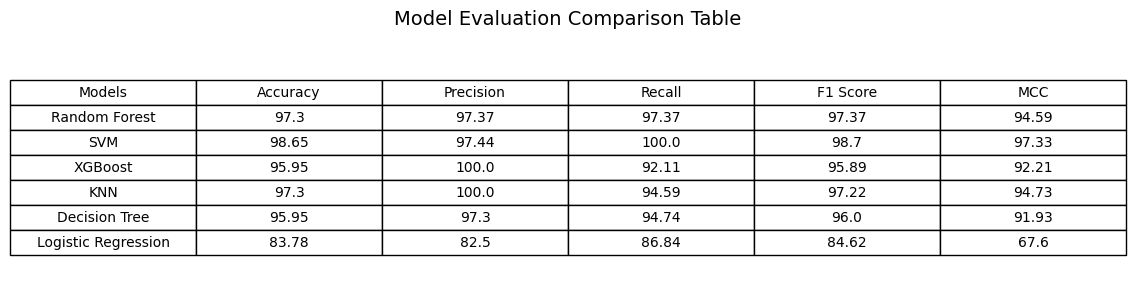

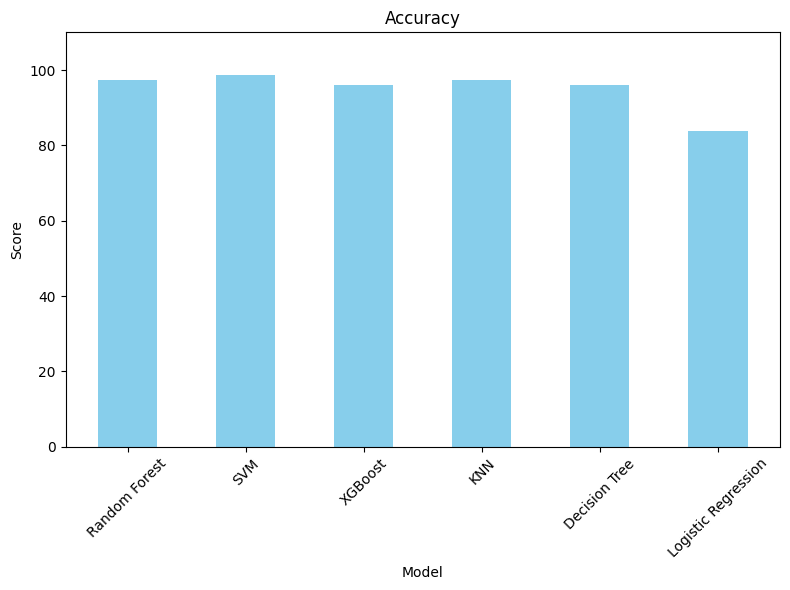

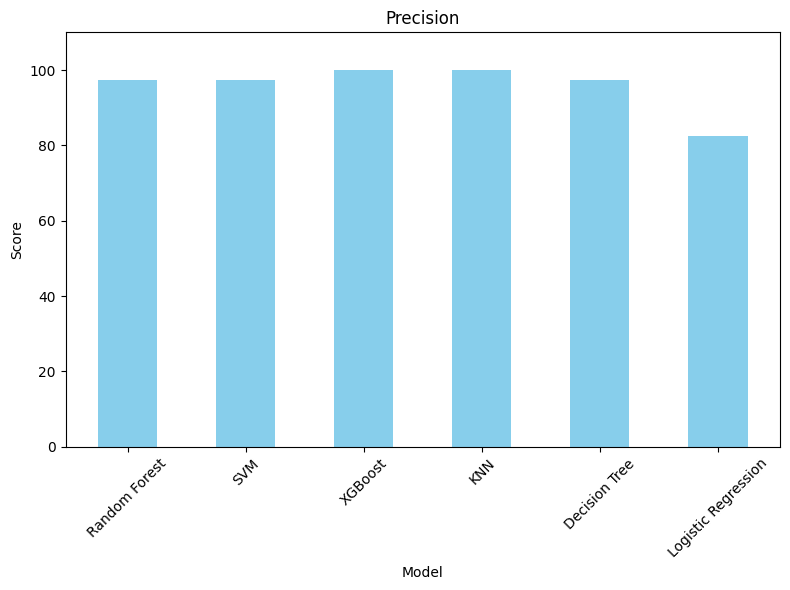

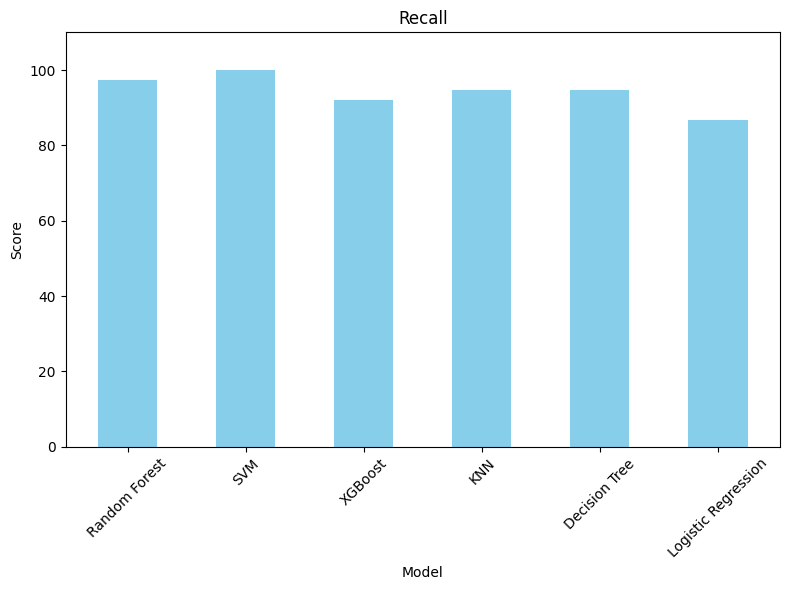

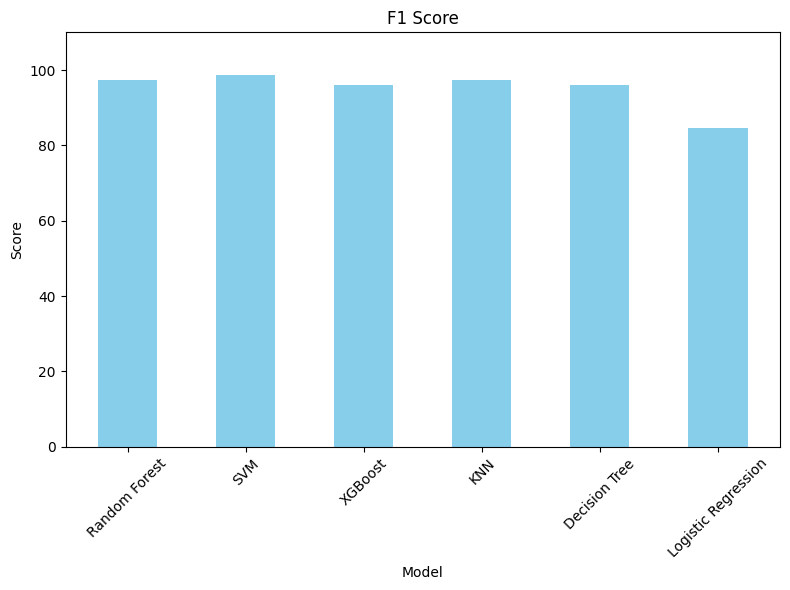

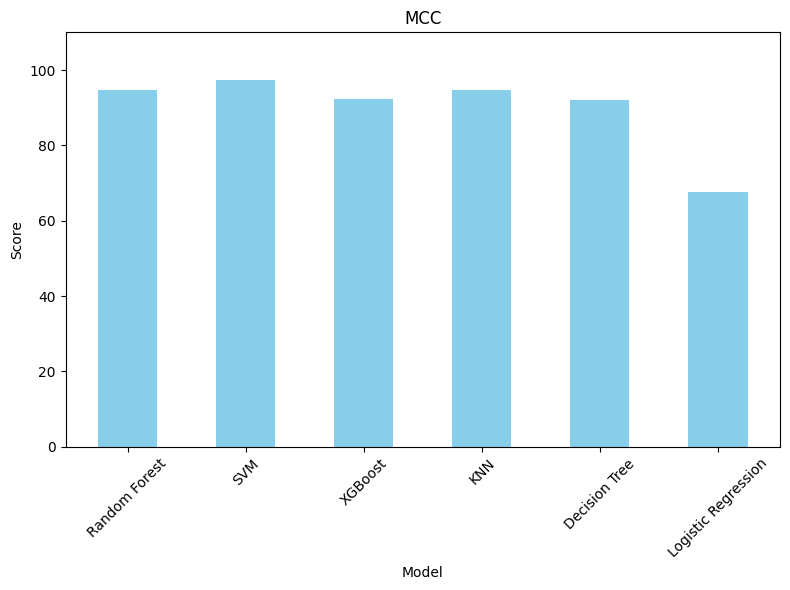

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data setup
models = ['Random Forest', 'SVM', 'XGBoost', 'KNN', 'Decision Tree', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']

scores = {
    'Random Forest': [97.3, 97.37, 97.37, 97.37, 94.5906],
    'SVM': [98.65, 97.44, 100.0, 98.7, 97.329],
    'XGBoost': [95.95, 100.0, 92.11, 95.89, 92.2064],
    'KNN': [97.3, 100.0, 94.59, 97.22, 94.7331],
    'Decision Tree': [95.95, 97.3, 94.74, 96.0, 91.9255],
    'Logistic Regression': [83.78, 82.5, 86.84, 84.62, 67.5956]
}

# Convert to DataFrame
df_scores = pd.DataFrame(scores, index=metrics).T
print("\n=== Model Evaluation Comparison Table ===\n")
print(df_scores.round(2))  # Display rounded table in console

# Plot comparison table with "Models" header
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')  # Turn off the axis

# Add a column label "Models" manually
col_labels = ['Models'] + df_scores.columns.tolist()
cell_text = [[model] + list(df_scores.loc[model].round(2)) for model in df_scores.index]

table = ax.table(cellText=cell_text,
                 colLabels=col_labels,
                 cellLoc='center',
                 loc='center')

table.scale(1.2, 1.5)  # Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Model Evaluation Comparison Table", fontsize=14, pad=20)

plt.savefig("Evaluation_Comparison_Table.png")
plt.show()

# Bar chart for each metric
bar_width = 1
spacing = 2
score_array = np.array([scores[model] for model in models])

for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(8, 6))
    x_pos = np.arange(len(models)) * spacing
    ax.bar(x_pos, score_array[:, i], width=bar_width, color='skyblue')

    ax.set_title(f'{metric}')
    ax.set_ylim([0, 110])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=45)

    plt.tight_layout()
    plt.savefig(f'{metric}_comparison.png')
    plt.show()
    plt.close()
